In [1]:
import argparse
import cv2
import glob
import os
from basicsr.archs.rrdbnet_arch import RRDBNet
from basicsr.utils.download_util import load_file_from_url
import numpy as np 
from realesrgan import RealESRGANer
from realesrgan.archs.srvgg_arch import SRVGGNetCompact
from tqdm import tqdm 

In [19]:

netscale = 4
test_dir = '/home/zsun/Forme/Real-ESRGAN-master-2/Part_test/'
ref_test_dir = '/home/zsun/Forme/Real-ESRGAN-master-2/Part_test_ref/'
files = os.listdir(ref_test_dir)
images_ref = [file for file in files if file.endswith(('jpeg', 'png', 'jpg'))]
images_ref.sort()
files = os.listdir(test_dir)
images_test= [file for file in files if file.endswith(('jpeg', 'png', 'jpg'))]
images_test.sort()

In [20]:
def PSNR(im_gt,im_output):
    mse = np.mean((im_gt-im_output)**2)
    if mse ==0:
        psnr = float('inf')
    else:
        psnr = 10* np.log10(255.0**2/mse)
    return psnr

In [21]:
iter_list = list(range(5000, 95001, 5000))
model_name_list = ['net_g_'+ str(model_name) +'.pth' for model_name in iter_list]
# iter_list
# print(model_name_list)
model_dir = 'experiments/finetune_RealESRGANx4plus_400k_pairdata/models'
# model_dir = '/home/zsun/Forme/Real-ESRGAN-master-2/fine-tune_1/models'

In [6]:
mean_psnr_list = np.zeros_like(iter_list,dtype=np.float32)
print(mean_psnr_list)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
i=0
for model_name in model_name_list:
    model_path = os.path.join(model_dir,model_name)  
    model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)
    upsampler = RealESRGANer(
        scale=netscale,
        model_path=model_path,
        dni_weight=None,
        model=model,
        tile=0,
        tile_pad=10,
        pre_pad=0,
        half=not False,
        gpu_id=None)
    print(f"model {model_name} is created")
    sum_psnr = 0
    for ref,lr in tqdm(zip(images_ref,images_test),total = len(images_ref)):
        im_ref = cv2.imread(ref_test_dir+ref)
        im_lr = cv2.imread(test_dir+lr)
        # print(im_ref.shape)
        try:
            im_output,_ = upsampler.enhance(im_lr,outscale=4)
        except RuntimeError as error:
            print('Error', error)
            print('If you encounter CUDA out of memory, try to set --tile with a smaller number.')
        psnr = PSNR(im_gt=im_ref,im_output=im_output)
        # print(psnr)
        sum_psnr = sum_psnr + psnr
    # break
    # print(i)
    mean_psnr_list[i] = sum_psnr /len(images_ref)
    print(mean_psnr_list[i])
    i=i+1
   
    

model net_g_5000.pth is created


100%|██████████| 25/25 [00:14<00:00,  1.76it/s]


30.07362
model net_g_10000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.81it/s]


30.049662
model net_g_15000.pth is created


100%|██████████| 25/25 [00:14<00:00,  1.74it/s]


30.0492
model net_g_20000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.79it/s]


30.047192
model net_g_25000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.82it/s]


30.062983
model net_g_30000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.83it/s]


30.058178
model net_g_35000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.83it/s]


30.040638
model net_g_40000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.83it/s]


30.056034
model net_g_45000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.82it/s]


30.051104
model net_g_50000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.82it/s]


30.048407
model net_g_55000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.82it/s]


30.047853
model net_g_60000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.82it/s]


30.05476
model net_g_65000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.81it/s]


30.072964
model net_g_70000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.81it/s]


30.054962
model net_g_75000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.82it/s]


30.06657
model net_g_80000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.82it/s]


30.076406
model net_g_85000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.81it/s]


30.06933
model net_g_90000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.81it/s]


30.06091
model net_g_95000.pth is created


100%|██████████| 25/25 [00:13<00:00,  1.81it/s]

30.063643


Text(0.5, 1.0, 'Mean PSNR on FULL TEST')

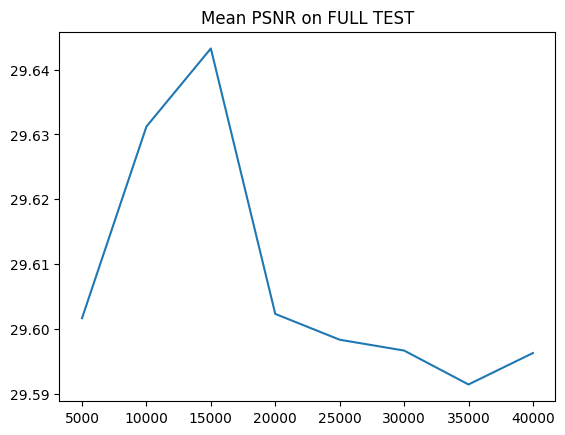

In [9]:
# PLOT
import matplotlib.pylab as plt
iter_list = list(range(5000,40001,5000))
values_full_test = [29.601673, 29.631217, 29.64325, 29.602331, 29.598352, 29.596682, 29.591452, 29.596299]

plt.plot(iter_list,values_full_test)
plt.title("Mean PSNR on FULL TEST")

In [14]:
np.savez('2_70000_115000',mean_psnr_list) 

[29.968946 29.8716   29.864637 29.846363 29.83524  29.829075 29.896048
 29.865244 29.813042 29.75807  29.77171  29.69782  29.654427 29.540901
 29.504536 29.486858 29.486858 29.472534 29.56133  29.59626  29.556803
 29.411877 29.492468 29.682318 29.743904 29.775723 29.738537 29.570992
 29.663946 29.644783 29.557112 29.474245 29.680758 29.680758 29.67231
 29.73722  29.638245 29.457472 29.618912 29.672846 29.419167 29.504223
 29.582138]


Text(0, 0.5, 'PSNR')

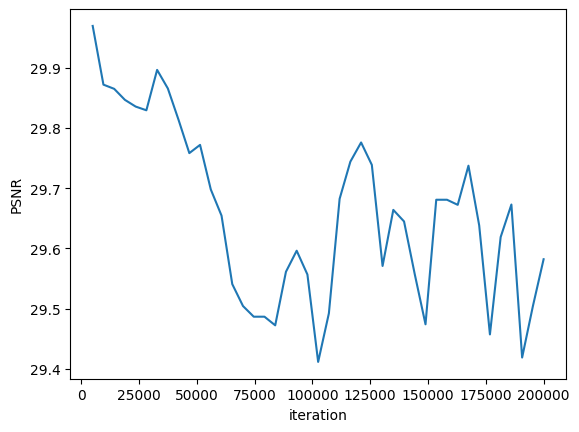

In [81]:
a = np.load('5000_80000.npz')['arr_0']
b = np.load('80000_160000.npz')['arr_0']
c = np.load('160000_200000.npz')['arr_0']
mean_psnr = np.concatenate((a,b,c))
print(mean_psnr)
plt.plot(np.linspace(5000,200000,len(mean_psnr)),mean_psnr)
plt.xlabel('iteration')
plt.ylabel('PSNR') 

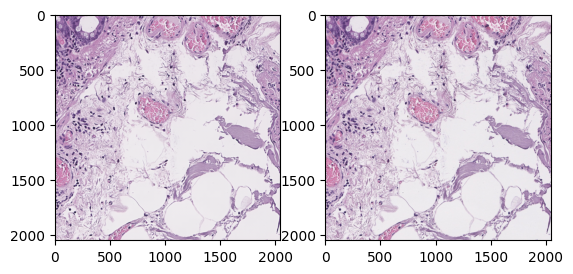

In [9]:
plt.subplot(121)
plt.imshow(cv2.cvtColor(im_output, cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(im_ref,cv2.COLOR_BGR2RGB))

plt.show()

In [8]:
# Save Result 

In [30]:
model_dir = '/home/zsun/Forme/Real-ESRGAN-master-2/experiments/finetune_RealESRGANx4plus_400k_pairdata/models'
output = '/home/zsun/Forme/Real-ESRGAN-master-2/outputs_latest_3'
model_name = 'net_g_latest.pth'
model_path = os.path.join(model_dir,model_name)  
model = RRDBNet(num_in_ch=3, num_out_ch=3, num_feat=64, num_block=23, num_grow_ch=32, scale=4)
upsampler = RealESRGANer(
    scale=netscale,
    model_path=model_path,
    dni_weight=None,
    model=model,
    tile=0,
    tile_pad=10,
    pre_pad=0,
    half=not False,
    gpu_id=None)
print(f"model {model_path} is created")
for ref,lr in tqdm(zip(images_ref,images_test),total = len(images_ref)):
        # im_ref = cv2.imread(ref_test_dir+ref)
        im_lr = cv2.imread(test_dir+lr)
        # print(im_ref.shape)
        try:
            im_output,_ = upsampler.enhance(im_lr,outscale=4)
        except RuntimeError as error:
            print('Error', error)
            print('If you encounter CUDA out of memory, try to set --tile with a smaller number.')
        os.makedirs(output, exist_ok=True)
        save_path = os.path.join(output,f'{lr}_out.png')
        # print(save_path)    
        cv2.imwrite(save_path,im_output) 
        

model /home/zsun/Forme/Real-ESRGAN-master-2/experiments/finetune_RealESRGANx4plus_400k_pairdata/models/net_g_latest.pth is created


100%|██████████| 25/25 [00:16<00:00,  1.48it/s]


In [6]:
del upsampler 

In [7]:
del model

: 